In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from collections import Counter as counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge

data = pd.read_csv ('fifa19_dataSet.csv', encoding = 'ISO-8859-1',)

In [2]:
#the first 5 players in the data
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M


In [3]:
#all the players who are under 23 years old and their potential is over 87
data[(data['Age']<23) & (data['Potential']>87) ]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
25,25,231747,K. MbappÃ©,19,https://cdn.sofifa.org/players/4/19/231747.png,France,https://cdn.sofifa.org/flags/18.png,88,95,Paris Saint-Germain,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,â¬166.1M
55,55,222492,L. SanÃ©,22,https://cdn.sofifa.org/players/4/19/222492.png,Germany,https://cdn.sofifa.org/flags/21.png,86,92,Manchester City,...,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,â¬125.1M
79,79,220834,Marco Asensio,22,https://cdn.sofifa.org/players/4/19/220834.png,Spain,https://cdn.sofifa.org/flags/45.png,85,92,Real Madrid,...,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,â¬121.5M
110,110,220793,D. SÃ¡nchez,22,https://cdn.sofifa.org/players/4/19/220793.png,Colombia,https://cdn.sofifa.org/flags/56.png,84,88,Tottenham Hotspur,...,75.0,84.0,85.0,88.0,9.0,7.0,10.0,6.0,15.0,â¬65.5M
115,115,212190,N. SÃ¼le,22,https://cdn.sofifa.org/players/4/19/212190.png,Germany,https://cdn.sofifa.org/flags/21.png,84,90,FC Bayern MÃ¼nchen,...,72.0,82.0,85.0,83.0,15.0,7.0,14.0,7.0,15.0,â¬67.5M
116,116,211300,A. Martial,22,https://cdn.sofifa.org/players/4/19/211300.png,France,https://cdn.sofifa.org/flags/18.png,84,90,Manchester United,...,79.0,38.0,39.0,36.0,9.0,8.0,8.0,15.0,11.0,â¬87.1M
117,117,211117,D. Alli,22,https://cdn.sofifa.org/players/4/19/211117.png,England,https://cdn.sofifa.org/flags/14.png,84,90,Tottenham Hotspur,...,86.0,70.0,70.0,63.0,7.0,6.0,9.0,11.0,8.0,â¬87.1M
155,155,231443,O. DembÃ©lÃ©,21,https://cdn.sofifa.org/players/4/19/231443.png,France,https://cdn.sofifa.org/flags/18.png,83,92,FC Barcelona,...,75.0,42.0,30.0,33.0,6.0,6.0,14.0,10.0,13.0,â¬90M
156,156,230666,Gabriel Jesus,21,https://cdn.sofifa.org/players/4/19/230666.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,92,Manchester City,...,82.0,53.0,23.0,19.0,13.0,8.0,6.0,6.0,15.0,â¬84.1M
160,160,225850,P. Kimpembe,22,https://cdn.sofifa.org/players/4/19/225850.png,France,https://cdn.sofifa.org/flags/18.png,83,89,Paris Saint-Germain,...,80.0,80.0,83.0,83.0,7.0,8.0,14.0,15.0,9.0,â¬62.5M


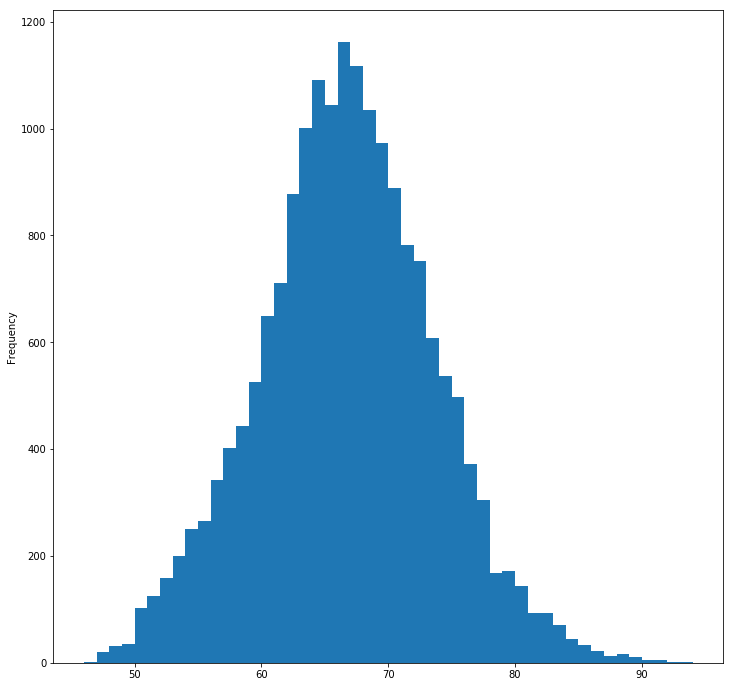

In [4]:
#how many players have foreach overall rating
data.Overall.plot(kind = 'hist', bins = 48,figsize = (12,12))
plt.show()

In [5]:
#all the Israeli players
Israeli_Players = data.Nationality=='Israel'
data [Israeli_Players]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
461,461,204399,E. Zahavi,30,https://cdn.sofifa.org/players/4/19/204399.png,Israel,https://cdn.sofifa.org/flags/26.png,80,80,Guangzhou R&F; FC,...,74.0,30.0,41.0,34.0,13.0,12.0,13.0,8.0,16.0,â¬31.2M
848,848,198648,B. Natcho,30,https://cdn.sofifa.org/players/4/19/198648.png,Israel,https://cdn.sofifa.org/flags/26.png,78,78,Olympiacos CFP,...,84.0,70.0,72.0,64.0,14.0,13.0,12.0,15.0,16.0,â¬20.9M
1030,1030,208498,M. Dabbur,26,https://cdn.sofifa.org/players/4/19/208498.png,Israel,https://cdn.sofifa.org/flags/26.png,77,80,FC Red Bull Salzburg,...,66.0,22.0,37.0,27.0,13.0,12.0,10.0,15.0,11.0,â¬17.3M
1601,1601,164878,L. Refaelov,32,https://cdn.sofifa.org/players/4/19/164878.png,Israel,https://cdn.sofifa.org/flags/26.png,75,75,Royal Antwerp FC,...,79.0,42.0,52.0,50.0,10.0,8.0,9.0,16.0,9.0,â¬7.5M
3164,3164,199661,A. Cohen,29,https://cdn.sofifa.org/players/4/19/199661.png,Israel,https://cdn.sofifa.org/flags/26.png,73,73,FC Ingolstadt 04,...,70.0,72.0,74.0,75.0,6.0,13.0,6.0,13.0,7.0,â¬5M
3258,3258,193550,B. Kayal,30,https://cdn.sofifa.org/players/4/19/193550.png,Israel,https://cdn.sofifa.org/flags/26.png,72,72,Brighton & Hove Albion,...,72.0,68.0,71.0,68.0,10.0,8.0,11.0,14.0,6.0,â¬5.5M
3901,3901,206316,T. Ben Haim,28,https://cdn.sofifa.org/players/4/19/206316.png,Israel,https://cdn.sofifa.org/flags/26.png,72,72,Sparta Praha,...,76.0,35.0,24.0,26.0,10.0,15.0,14.0,8.0,9.0,â¬6.9M
4685,4685,206317,N. Bitton,26,https://cdn.sofifa.org/players/4/19/206317.png,Israel,https://cdn.sofifa.org/flags/26.png,71,72,Celtic,...,76.0,67.0,73.0,70.0,14.0,10.0,8.0,11.0,6.0,â¬4.3M
4708,4708,204276,T. Hemed,31,https://cdn.sofifa.org/players/4/19/204276.png,Israel,https://cdn.sofifa.org/flags/26.png,71,71,Queens Park Rangers,...,65.0,27.0,37.0,15.0,12.0,12.0,11.0,9.0,11.0,NaN
5149,5149,208493,T. Tawatha,26,https://cdn.sofifa.org/players/4/19/208493.png,Israel,https://cdn.sofifa.org/flags/26.png,70,70,Eintracht Frankfurt,...,61.0,64.0,71.0,71.0,11.0,14.0,9.0,9.0,6.0,â¬2.6M


In [6]:
#all the data with their name, club, age, overall rating and potential
data[["Name", "Club","Age", "Overall", "Potential"]]

,Name,Club,Age,Overall,Potential
0,L. Messi,FC Barcelona,31,94,94
1,Cristiano Ronaldo,Juventus,33,94,94
2,Neymar Jr,Paris Saint-Germain,26,92,93
3,De Gea,Manchester United,27,91,93
4,K. De Bruyne,Manchester City,27,91,92
5,E. Hazard,Chelsea,27,91,91
6,L. ModriÄ,Real Madrid,32,91,91
7,L. SuÃ¡rez,FC Barcelona,31,91,91
8,Sergio Ramos,Real Madrid,32,91,91
9,J. Oblak,AtlÃ©tico Madrid,25,90,93


In [7]:
#all the Barcelona players with potential over 88
first_filter =  data.Club == 'FC Barcelona'
second_filter = data.Potential > 88
data[first_filter & second_filter]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
7,7,176580,L. SuÃ¡rez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,â¬164M
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,â¬123.3M
20,20,189511,Sergio Busquets,29,https://cdn.sofifa.org/players/4/19/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,89,89,FC Barcelona,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,â¬105.6M
32,32,189242,Coutinho,26,https://cdn.sofifa.org/players/4/19/189242.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,89,FC Barcelona,...,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,â¬147.7M
42,42,205600,S. Umtiti,24,https://cdn.sofifa.org/players/4/19/205600.png,France,https://cdn.sofifa.org/flags/18.png,87,92,FC Barcelona,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,â¬121.1M
155,155,231443,O. DembÃ©lÃ©,21,https://cdn.sofifa.org/players/4/19/231443.png,France,https://cdn.sofifa.org/flags/18.png,83,92,FC Barcelona,...,75.0,42.0,30.0,33.0,6.0,6.0,14.0,10.0,13.0,â¬90M
228,228,230658,Arthur,21,https://cdn.sofifa.org/players/4/19/230658.png,Brazil,https://cdn.sofifa.org/flags/54.png,82,90,FC Barcelona,...,84.0,65.0,76.0,70.0,6.0,13.0,13.0,11.0,12.0,â¬73.1M
236,236,222737,Malcom,21,https://cdn.sofifa.org/players/4/19/222737.png,Brazil,https://cdn.sofifa.org/flags/54.png,82,89,FC Barcelona,...,78.0,21.0,28.0,17.0,8.0,14.0,15.0,7.0,9.0,â¬70.9M
6102,6102,242816,Riqui Puig,18,https://cdn.sofifa.org/players/4/19/242816.png,Spain,https://cdn.sofifa.org/flags/45.png,69,89,FC Barcelona,...,70.0,53.0,57.0,53.0,12.0,15.0,14.0,12.0,9.0,â¬6.5M


C:\Users\97252\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


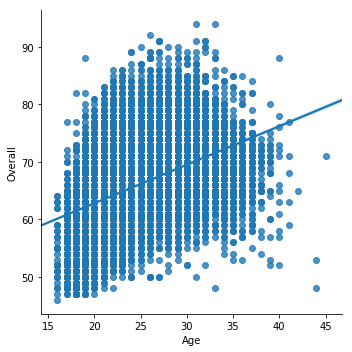

In [8]:
sns.lmplot ("Age", "Overall", data)

In [9]:
#best player in each position
top_players=data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Name','Position','Club', 'Overall']]
top_players.set_index('Position', inplace=True)
top_players

,Name,Club,Overall
Position,,,
CAM,A. Griezmann,AtlÃ©tico Madrid,89
CB,D. GodÃ­n,AtlÃ©tico Madrid,90
CDM,Sergio Busquets,FC Barcelona,89
CF,Luis Alberto,Lazio,82
CM,Thiago,FC Bayern MÃ¼nchen,86
GK,De Gea,Manchester United,91
LAM,J. RodrÃ­guez,FC Bayern MÃ¼nchen,88
LB,Marcelo,Real Madrid,88
LCB,G. Chiellini,Juventus,89


In [10]:
#top 3 features for each position
player_features = [
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
    ]
for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

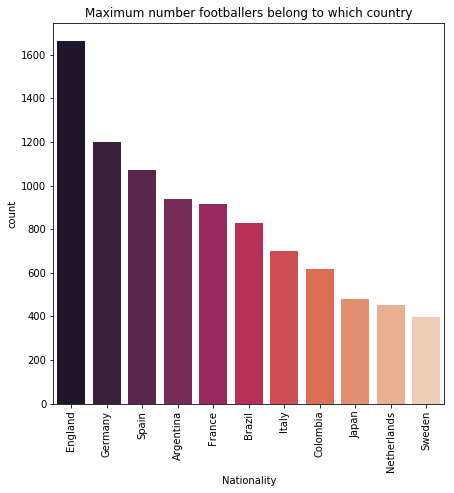

In [11]:
#Maximum number footballers belong to which country
plt.figure(1 , figsize = (7 , 7))
countries = []
c = counter(data['Nationality']).most_common()[:11]
for n in range(11):
    countries.append(c[n][0])

sns.countplot(x  = 'Nationality' ,
              data = data[data['Nationality'].isin(countries)] ,
              order  = data[data['Nationality'].isin(countries)]['Nationality'].value_counts().index , 
             palette = 'rocket') 
plt.xticks(rotation = 90)
plt.title('Maximum number footballers belong to which country' )
plt.show()

In [12]:
#the best players to buy in Career Mode
filtering_data1 = data.Age < 23
filtering_data2 = data.Overall < 82
filtering_data3 = data.Potential >87
best_buy=(data[filtering_data1 & filtering_data2 & filtering_data3].sort_values(by = 'Potential' , ascending = False))[['Name','Age','Club','Overall','Potential']]
best_buy

,Name,Age,Club,Overall,Potential
1143,VinÃ­cius JÃºnior,17,Real Madrid,77,92
734,A. Lafont,19,Fiorentina,78,90
415,H. Aouar,20,Olympique Lyonnais,80,90
1763,A. Meret,21,Napoli,75,89
1172,N. Barella,21,Cagliari,77,89
1149,R. Bentancur,21,Juventus,77,89
321,L. Bailey,20,Bayer 04 Leverkusen,81,89
1070,P. Cutrone,20,Milan,77,89
1004,J. Sancho,18,Borussia Dortmund,77,89
319,M. Rashford,20,Manchester United,81,89


In [7]:
#DROP UNNECESSARY VALUES
drop_cols = data.columns[28:54]
df1 = data.drop(drop_cols, axis = 1)
df2 = df1.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df3 = df2.dropna()
df3.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
#Turn Real Face into a binary indicator variable
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df3.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
df4 = df3.copy()

#Apply changes to dataset to create new column
df4['Real_Face'] = df4.apply(face_to_num, axis=1)
df4['Right_Foot'] = df4.apply(right_footed, axis=1)
df4['Simple_Position'] = df4.apply(simple_position,axis = 1)
df4['Major_Nation'] = df4.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df4["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df4["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df4["WorkRate2"]= tempwork[1]
#Drop original columns used
df4 = df4.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df4.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


In [9]:
#SPLIT ID AS A TARGET VALUE
target = df4.Overall
df7 = df4.drop(['Overall'], axis = 1)

#SPLIT TEST AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(df7, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)

(3630, 54) (14517, 54)


0.928909879338828
1.8256332306807517


<IPython.core.display.Javascript object>


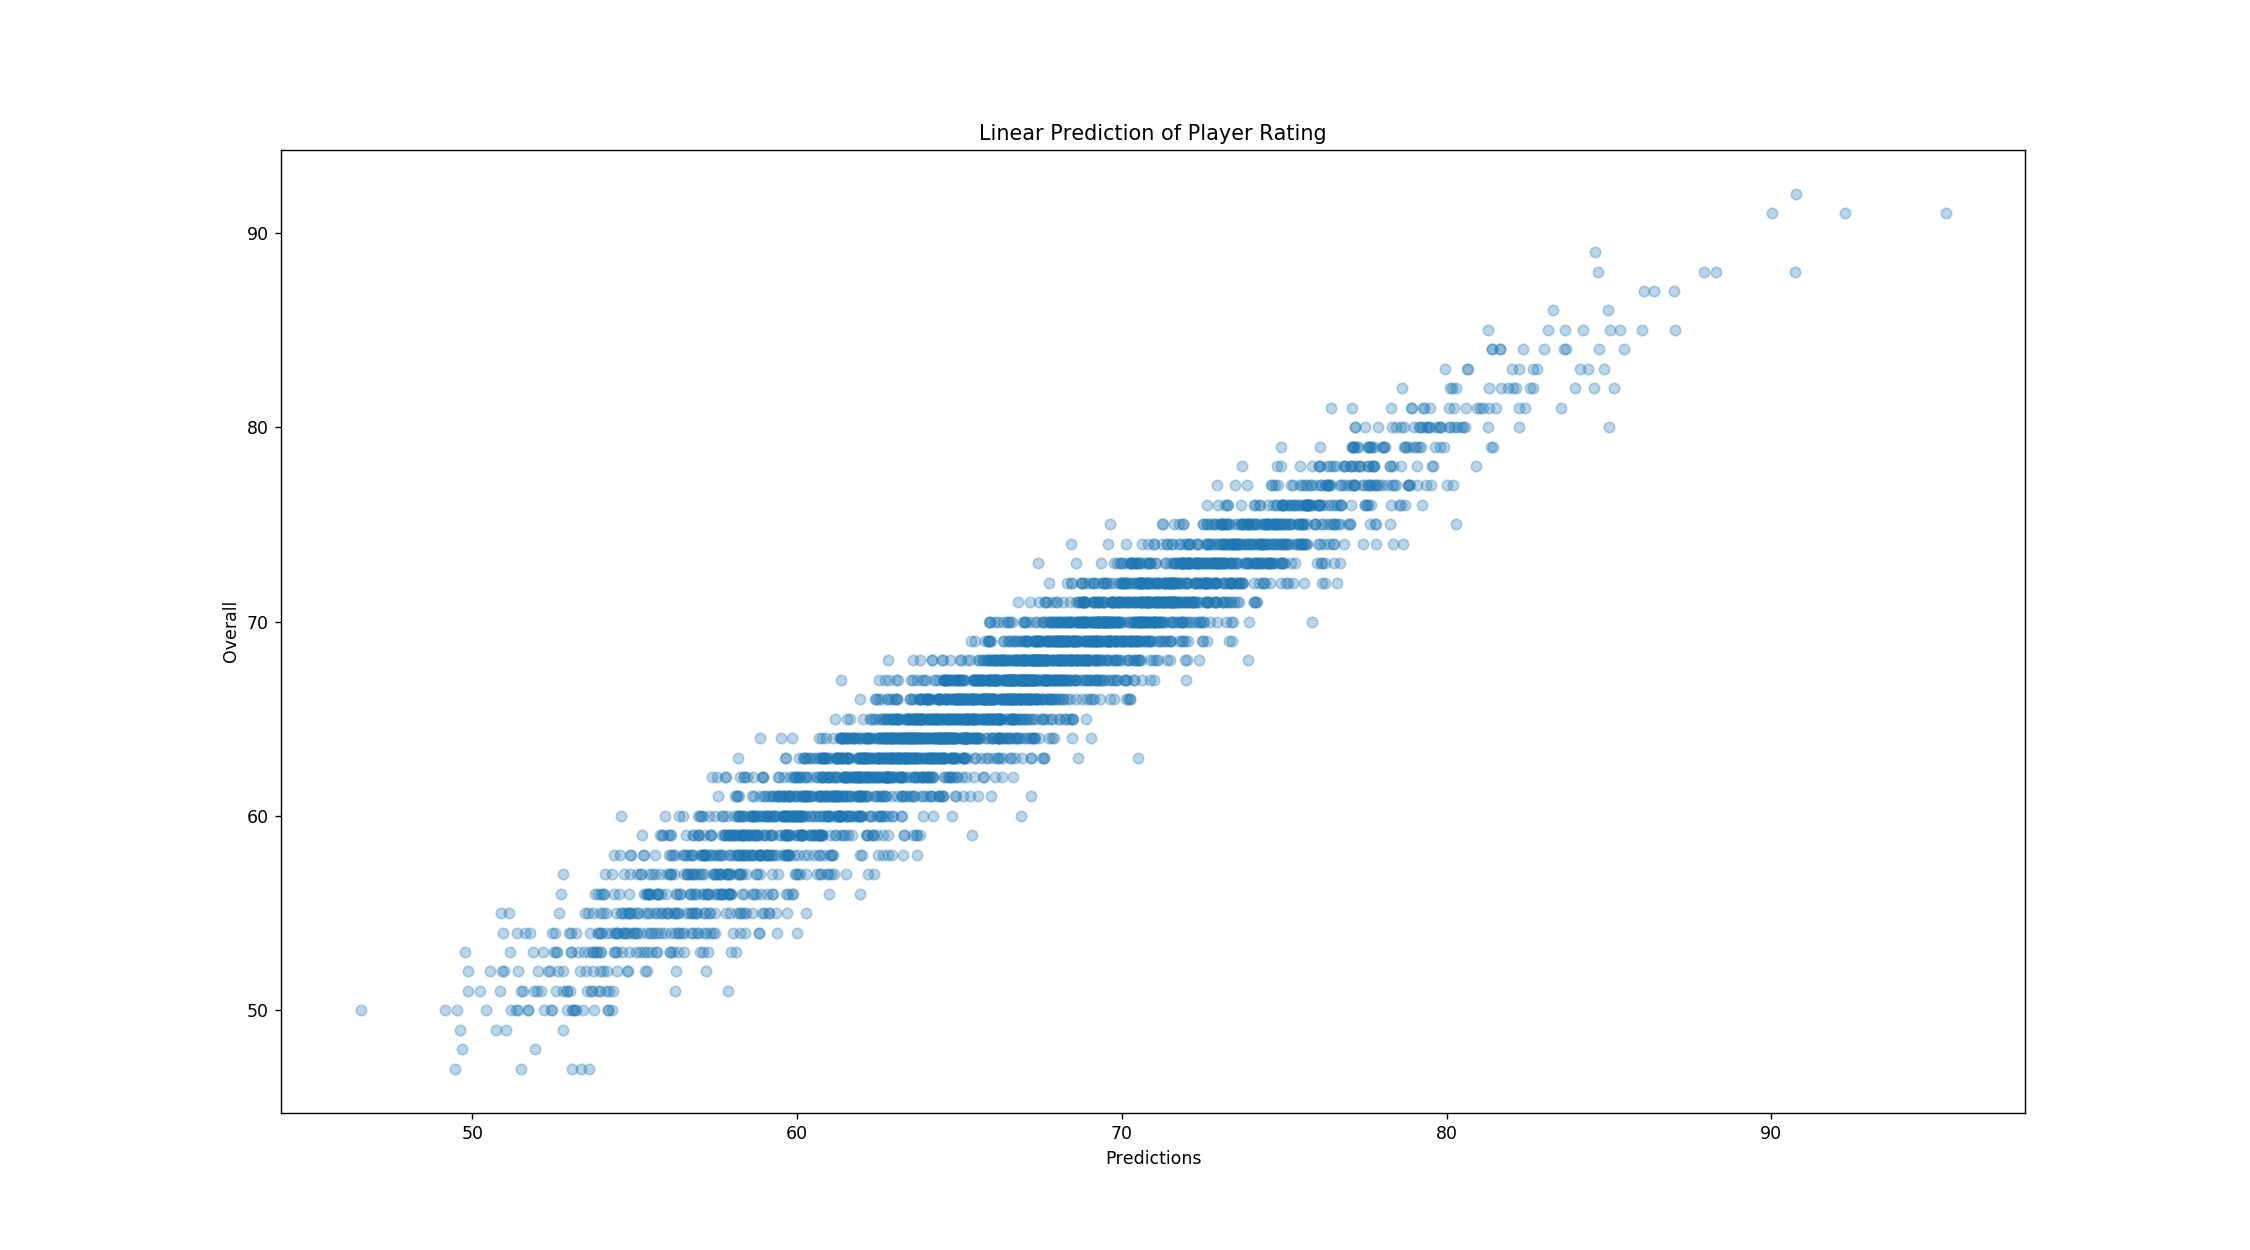

In [17]:
#LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

print(r2_score(y_test, predictions))
print(np.sqrt(mean_squared_error(y_test, predictions)))

plt.figure(figsize=(18,10))
plt.scatter(predictions,y_test,alpha = 0.3)
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

In [17]:
#RidgeRegression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [19]:
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)

ridge regression train score low alpha: 0.9317038030609953
ridge regression test score low alpha: 0.9245743613094152
